# JCT 可変複数裏付け（取引ごとに独立）

## 設定

In [1]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
from scripts.variableLocal import AutoAdjustmentTransaction
from scripts.exec_simulator import ExecuteAutoAdjustmentTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

## JCT ポートフォリオ

In [2]:
# a. 国内出来高
jct_portfolio_a = {
    'JPY': {
        'num': 100000000,
        'is_usd': False,
        'priority': 10,
    },
    '8306.T': {
        'num': 2000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False,
        'priority': 0,
    }
}

# b. 円安（GAFAM）
jct_portfolio_b = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# c. グロース（マザーズ）
jct_portfolio_c = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# d. 時価総額上位
jct_portfolio_d = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '9984.T': {
        'num': 10000,
        'is_usd': False
    },
    '6098.T': {
        'num': 10000,
        'is_usd': False
    },
    '6758.T': {
        'num': 5000,
        'is_usd': False
    }
}

# e. ボラティリティ
jct_portfolio_e = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 50000,
        'is_usd': False
    },
    'IVV': {
        'num': 300,
        'is_usd': True
    }
}

### ST ポートフォリオ

In [3]:
# a. 国内出来高
st_portfolio_a = {
    '7203.T': {
        'num': 70000,
        'is_usd': False
    },
    '9501.T': {
        'num': 200000,
        'is_usd': False
    },
    '4689.T': {
        'num': 120000,
        'is_usd': False
    }
}

# b. 円安（GAFAM）
st_portfolio_b = {
    'GOOGL': {
        'num': 150,
        'is_usd': True
    },
    'AMZN': {
        'num': 150,
        'is_usd': True
    },
    'FB': {
        'num': 1500,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
    'MSFT': {
        'num': 2000,
        'is_usd': True
    },
}

# c. グロース（マザーズ）
st_portfolio_c = {
    '4385.T': {
        'num': 10000,
        'is_usd': False
    },
    '4477.T': {
        'num': 100000,
        'is_usd': False
    },
    '2158.T': {
        'num': 15000,
        'is_usd': False
    },
    '3994.T': {
        'num': 10000,
        'is_usd': False
    }
}

# d. 時価総額上位
st_portfolio_d = {
    '7203.T': {
        'num': 65000,
        'is_usd': False
    },
    '9983.T': {
        'num': 1000,
        'is_usd': False
    },
    '6861.T': {
        'num': 1000,
        'is_usd': False
    }
}

# e. ボラティリティ
st_portfolio_e = {
    'TSLA': {
        'num': 750,
        'is_usd': True
    },
    'NVDA': {
        'num': 2000,
        'is_usd': True
    },
    '6195.T': {
        'num': 100000,
        'is_usd': False
    },
    '6920.T': {
        'num': 2500,
        'is_usd': False
    }
}

# NVIDIA
st_portfolio_f = {
    'NVDA': {
        'num': 5000,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
}

## シミュレーション（不足分自動現金補填）

In [4]:
from datetime import date, timedelta
def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = AutoAdjustmentTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 9, 1), lender_loan_ratio=1.05, print_log=True, auto_deposit=True)


print('Start simulation...')
print('='*50)
for date in date_range(date(2022, 9, 2), date(2022, 10, 1)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')

("JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, "
 "'8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': "
 "{'num': 100000, 'is_usd': False, 'priority': 0}}")
("ST portfolio: {'NVDA': {'num': 5000, 'is_usd': True}, 'AAPL': {'num': 4000, "
 "'is_usd': True}}")
2022-09-01: Price updating...
NVDA: 20940.5
AAPL: 21811.7
2022-09-01: Price updating...
JPY: 1.0
8306.T: 715.7
8604.T: 499.8
"JPY: {'num': 100000000, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 2000000, 'is_usd': False, 'priority': 1, 'price': 715.7}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 715.7,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
        

NVDA: 18478.5
AAPL: 21777.1
2022-09-16: Price updating...
JPY: 1.0
8306.T: 731.2
8604.T: 504.7
from Lender(B) to Borrower(A)
"JPY: {'num': 87502727, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-17
2022-09-17: Price updating...
NVDA: 18921.3
AAPL: 21605.1
2022-09-17: Price updating...
JPY: 1.0
8306.T: 733.7
8604.T: 505.5
from Borrower(A) to Lender(B)
"JPY: {'num': 18872259, 'is_usd': False, 'priority': 10, 'price': 1.0}"
既にあるやつで価格調整
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-18
2022-09-18: Price updating...
NVDA: 19104.8
AAPL: 22054.3
2022-09-18: Price updating...
JPY: 1.0
8306.T: 733.7
8604.T: 505.5
from Borrower(A) to Lender(B)
"JPY: {'num': 17636985, 'is_usd': False, 'priority': 10, 'price': 1.0}"
既にあるやつで価格調整
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-19
2022-09-19: Price u

In [7]:
from datetime import date, timedelta
simulator = ExecuteAutoAdjustmentTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 9, 1), date(2022,10,1),  lender_loan_ratio=1.05, print_log=True, auto_deposit=True)

print('Start simulation...')
logs = simulator.execute()
print("End simulation...")

("JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, "
 "'8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': "
 "{'num': 100000, 'is_usd': False, 'priority': 0}}")
("ST portfolio: {'NVDA': {'num': 5000, 'is_usd': True}, 'AAPL': {'num': 4000, "
 "'is_usd': True}}")
2022-09-01: Price updating...
NVDA: 20940.5
AAPL: 21811.7
2022-09-01: Price updating...
JPY: 1.0
8306.T: 715.7
8604.T: 499.8
"JPY: {'num': 100000000, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 2000000, 'is_usd': False, 'priority': 1, 'price': 715.7}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 715.7,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
        

NVDA: 18957.3
AAPL: 22427.3
2022-09-15: Price updating...
JPY: 1.0
8306.T: 723.5
8604.T: 505.7
from Borrower(A) to Lender(B)
"JPY: {'num': 16044798, 'is_usd': False, 'priority': 10, 'price': 1.0}"
既にあるやつで価格調整
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-16
2022-09-16: Price updating...
NVDA: 18478.5
AAPL: 21777.1
2022-09-16: Price updating...
JPY: 1.0
8306.T: 731.2
8604.T: 504.7
from Lender(B) to Borrower(A)
"JPY: {'num': 87502727, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-17
2022-09-17: Price updating...
NVDA: 

### ログの可視化

In [5]:
141885*715.7 + 100000000

201547094.5

In [8]:
def portfolio_sum(portfolio):
    total_value = 0
    for security in portfolio.values():
        total_value += security['num'] * security['price']
    return total_value

In [9]:
# logs = transaction.logs
pprint(logs)

date_list = logs['date']
collateral_portfolio_list = logs['collateral_portfolio']
collateral_sum_list = [portfolio_sum(log) for log in collateral_portfolio_list]
# collateral_sum_list = [portfolio_sum(log['collateral_portfolio']) for log in logs]
necessary_collateral_value_list = logs['necessary_collateral_value']
# print("corralteral_sum list: ", collateral_sum_list)
# print("necessary_collateral_value list: ", [log['necessary_collateral_value'] for log in logs])
jct_portfolio_list = logs['jct_portfolio']



{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 715.7,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 717.5,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 92531932,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 

In [7]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
jct_price_list = [log['jct_price'] for log in logs]
st_total_value_list = [log['st_total_value'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_difference'] for log in logs]
deposit_bool_list = [log['auto_deposit'] for log in logs]

jct_init_price = logs[0]['jct_price']
jct_price_change_list = [(log['jct_price'] / jct_init_price) for log in logs]
st_init_total_value = logs[0]['st_total_value']
st_total_value_change_list = [(log['st_total_value'] / st_init_total_value) for log in logs]

date_auto_deposit = []
for i, x in enumerate(deposit_bool_list):
    if x:
        date_auto_deposit.append(date_list[i])

KeyError: 'jct_price'

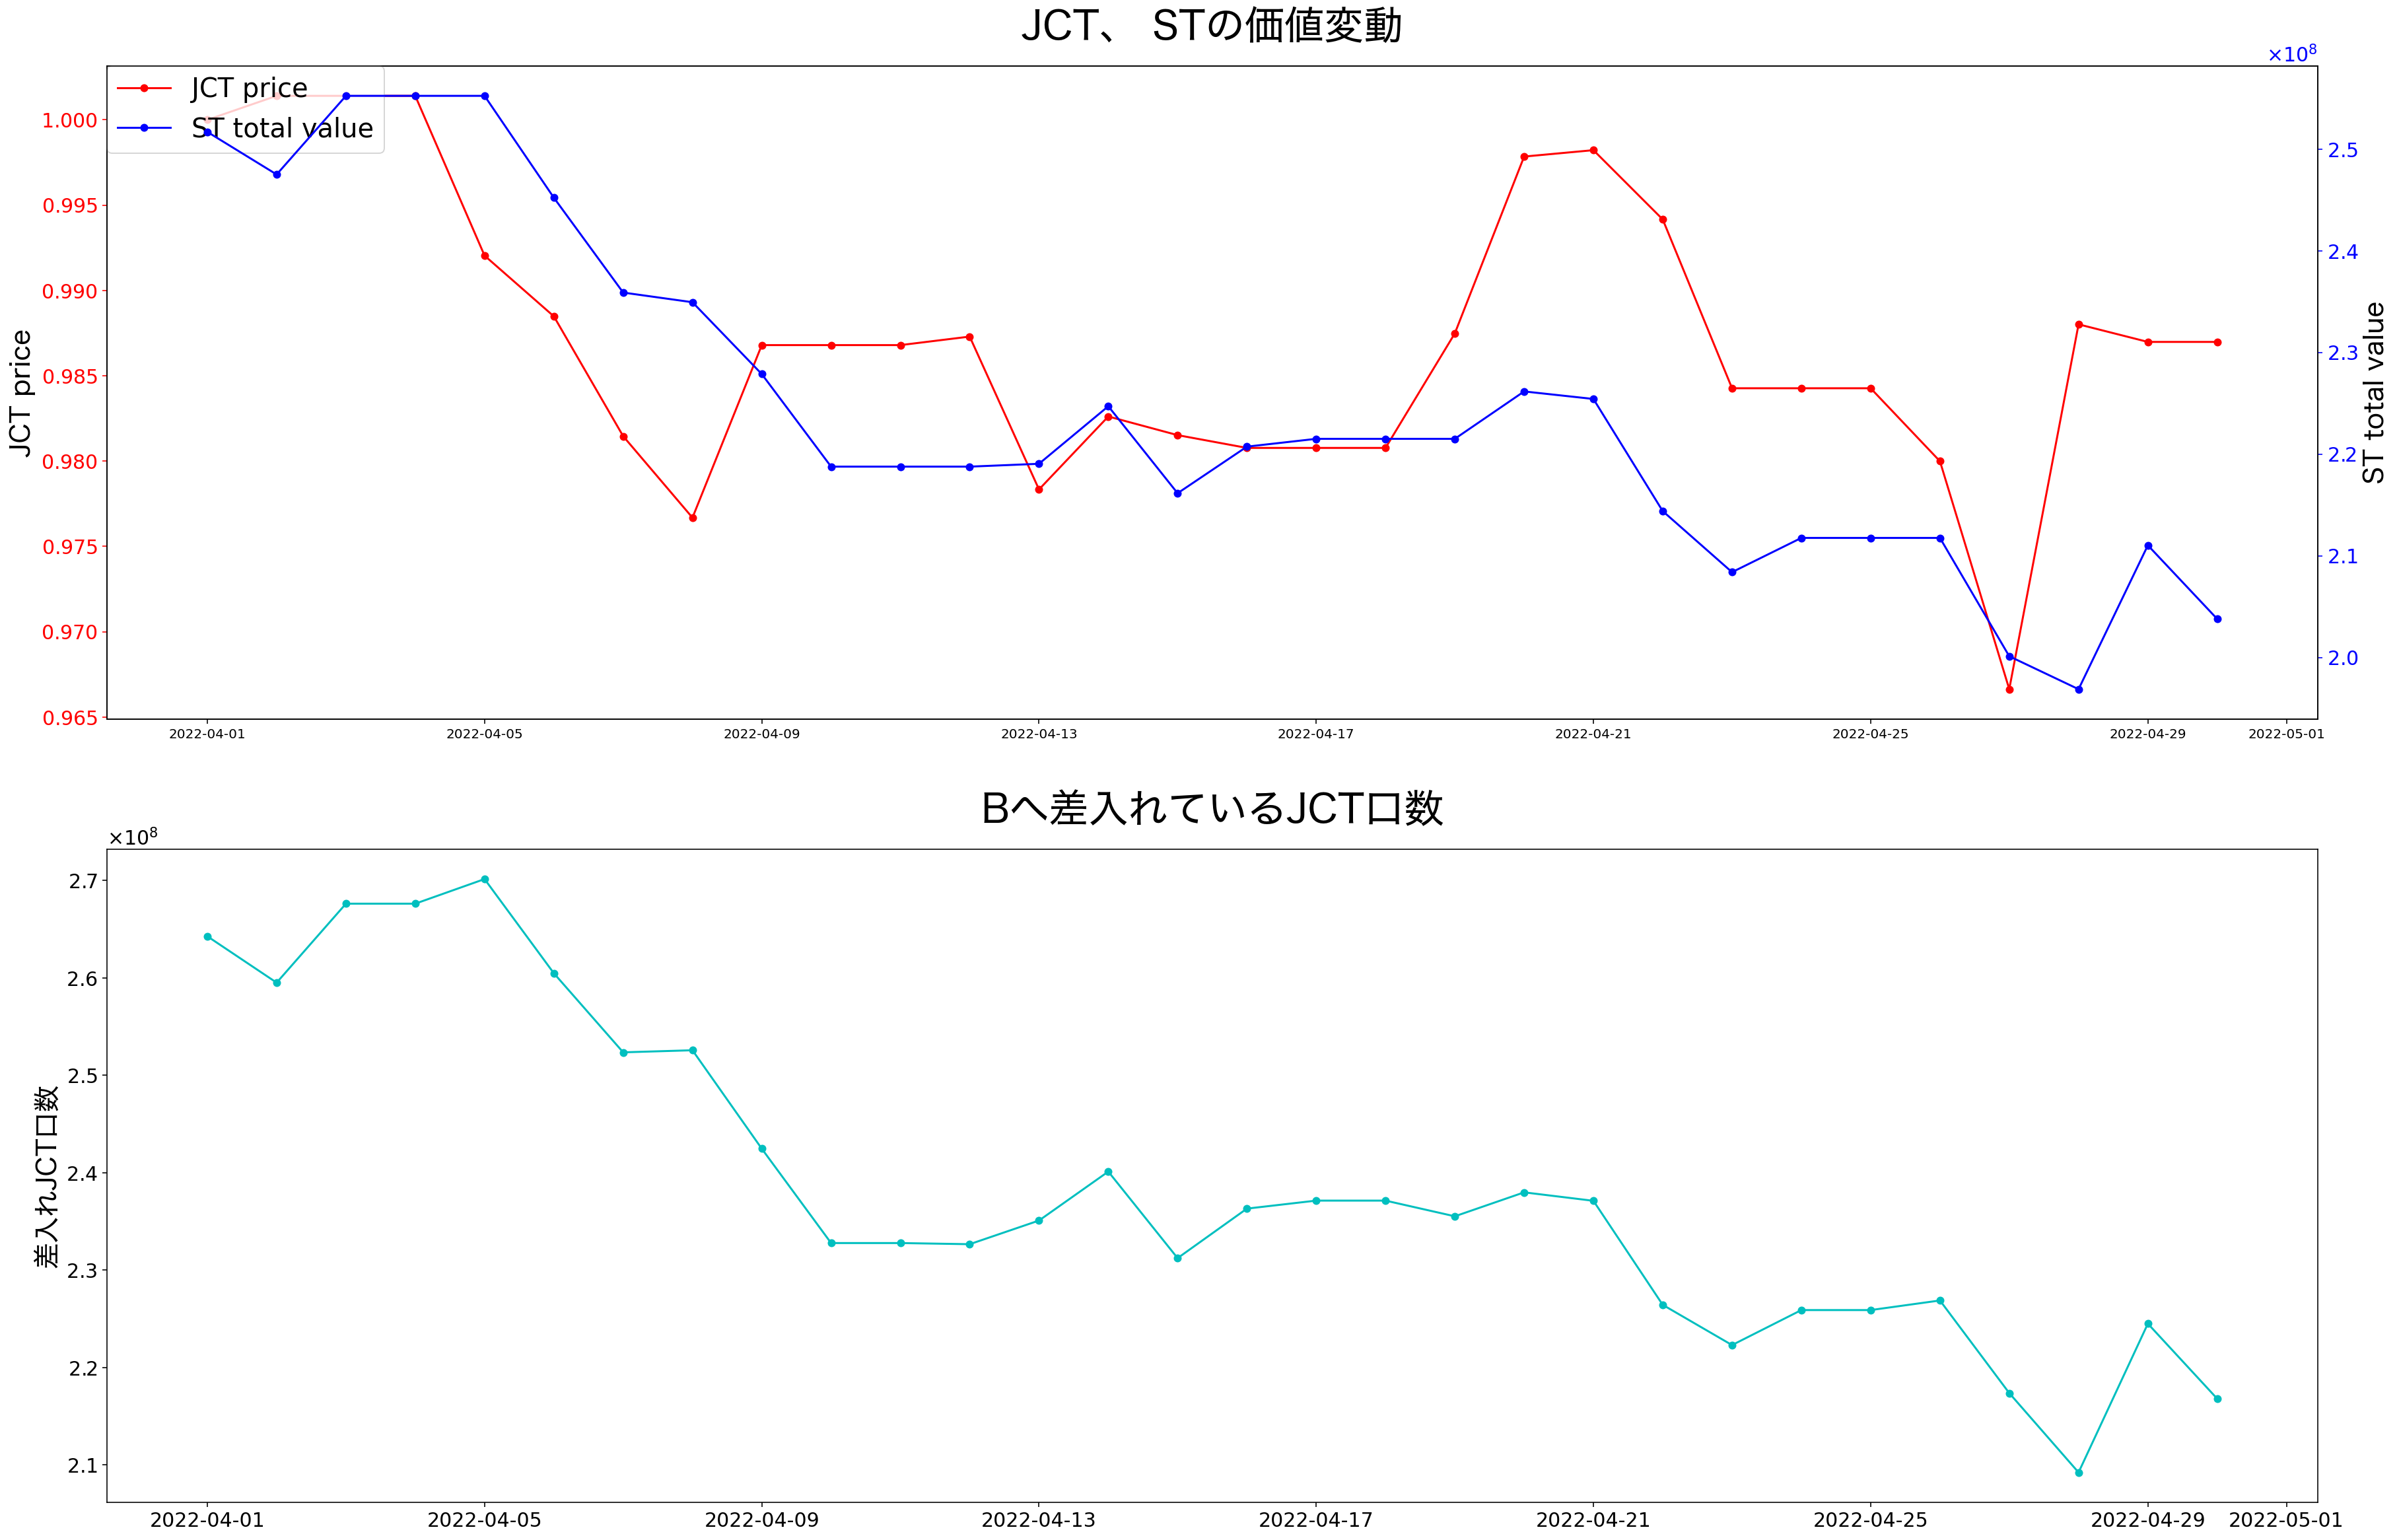

In [6]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_price_list), max(jct_price_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='c')
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('Bへ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

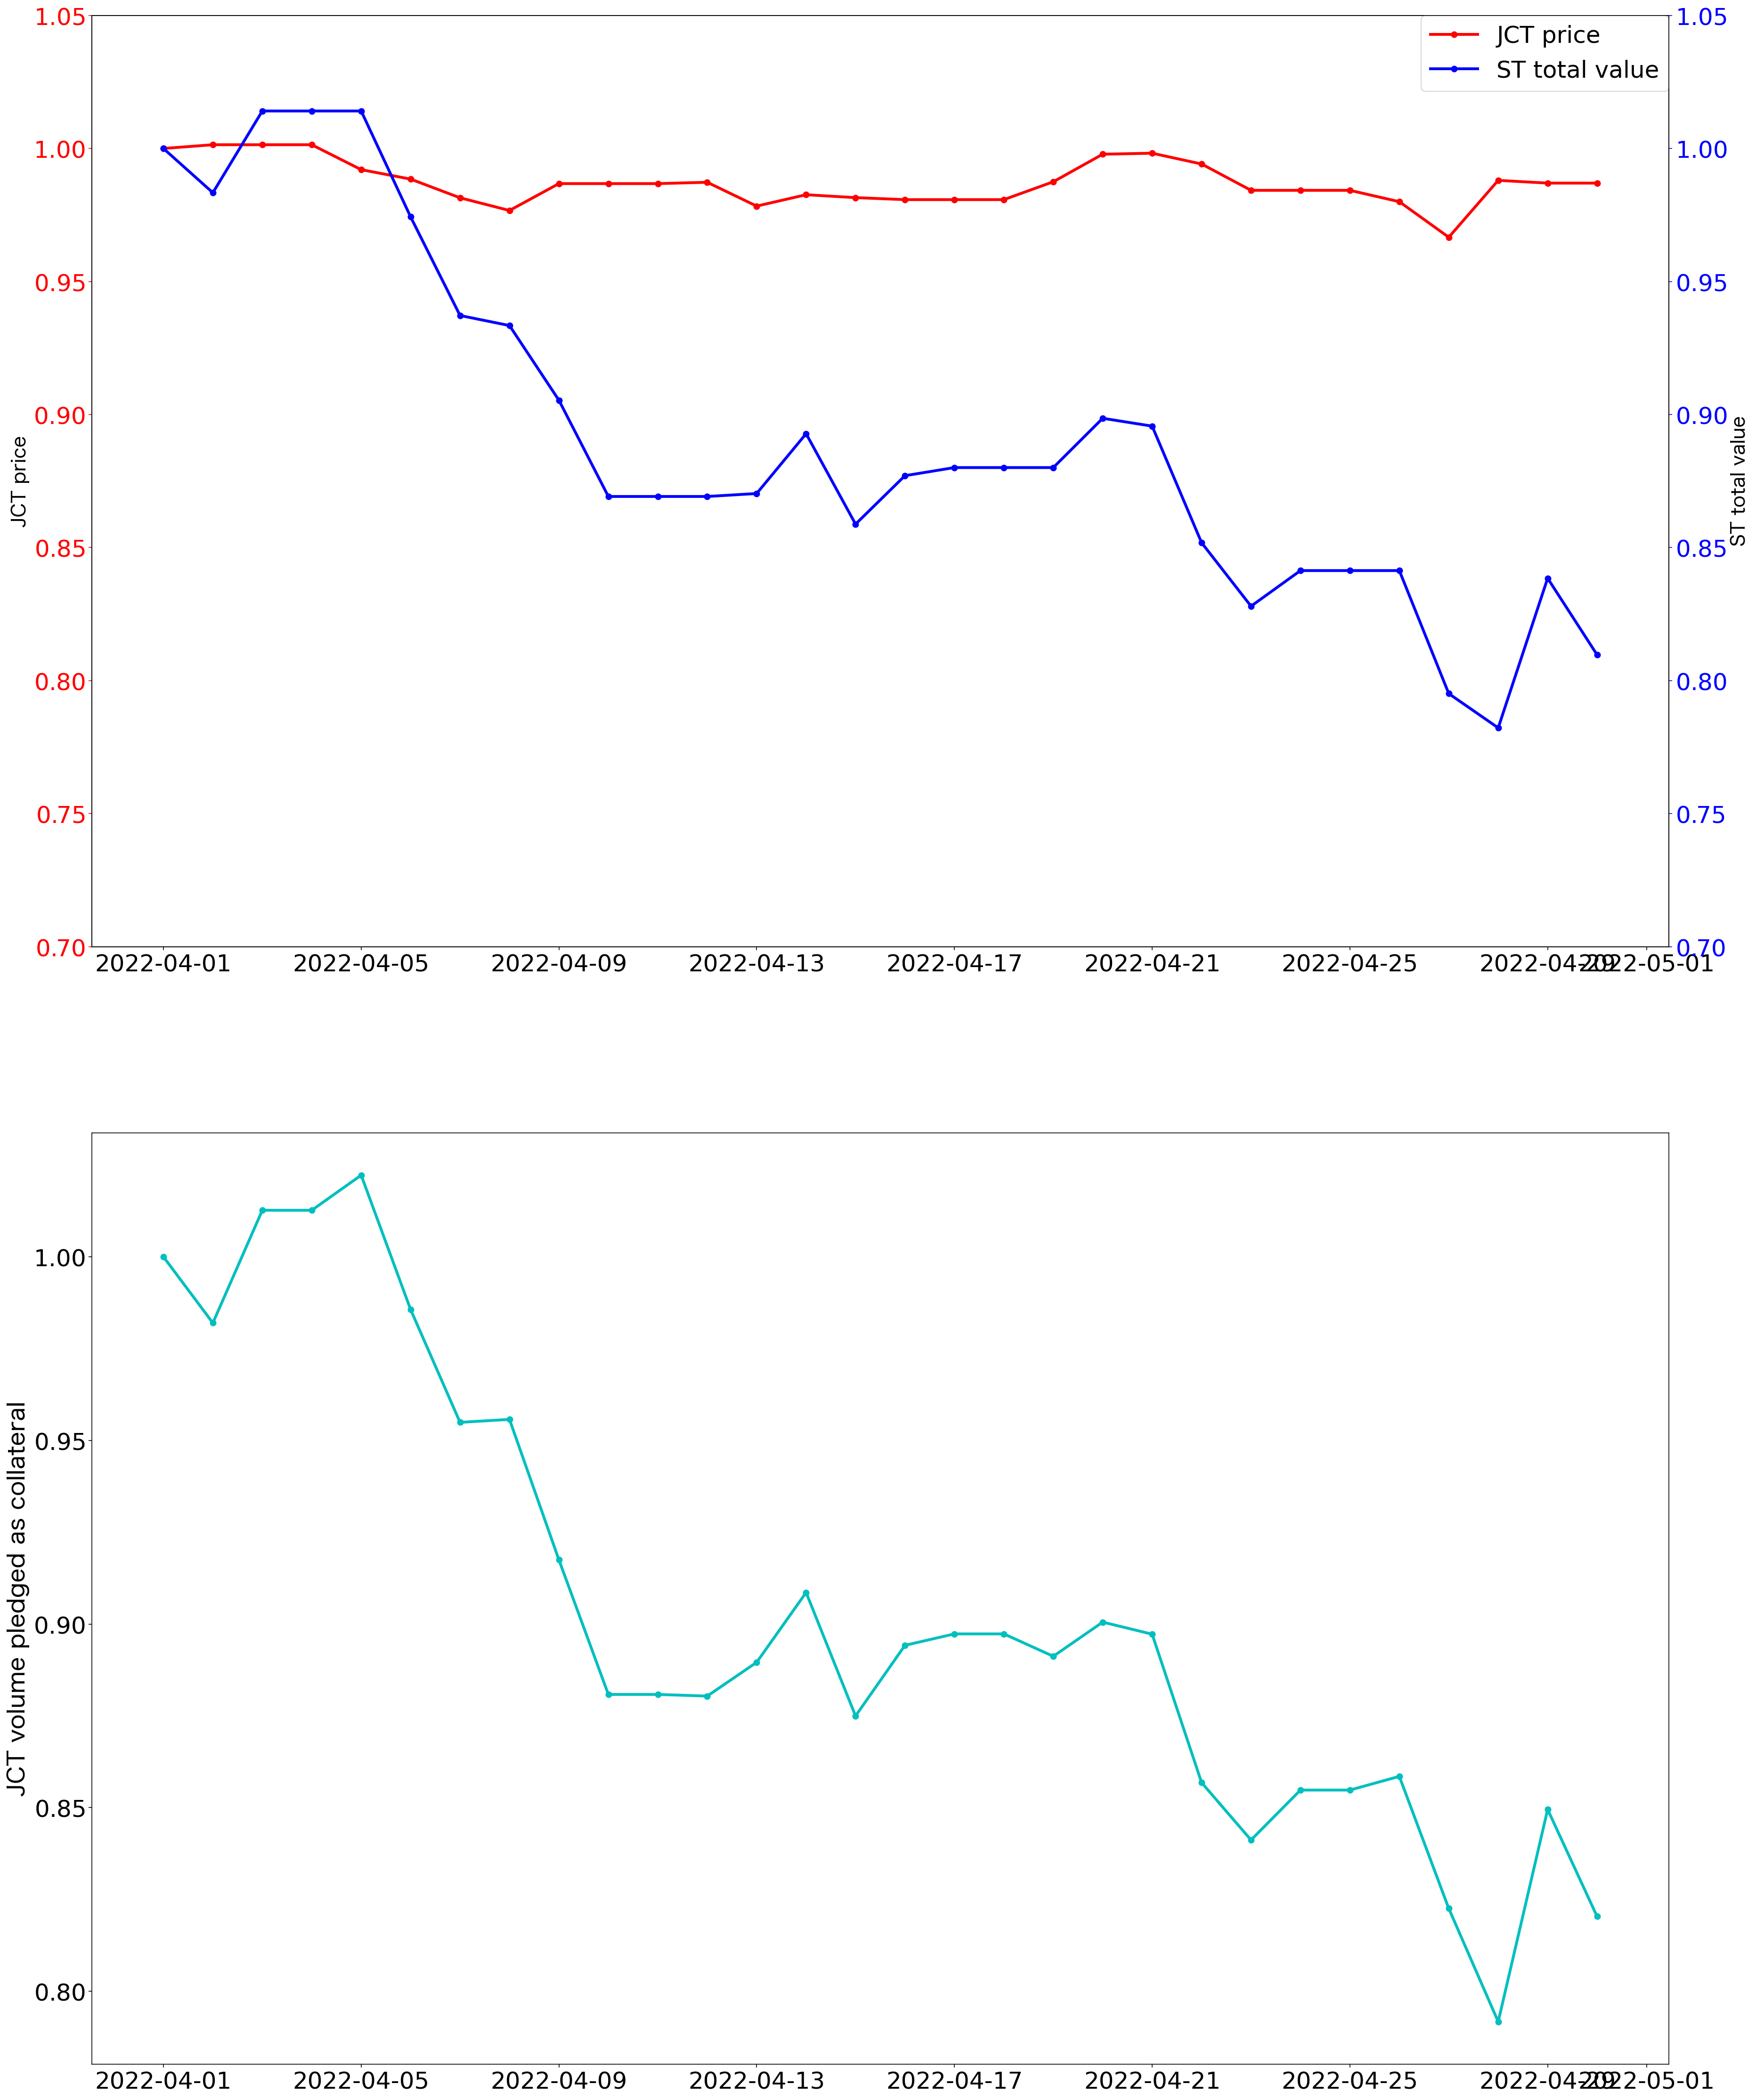

In [18]:
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

# plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_change_list, marker='o', markersize=6, color='red', linewidth=3, label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_change_list, marker='o', markersize=6, color='blue', linewidth=3,  label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.set_ylim(0.7, 1.05)
ax1_2.set_ylim(0.7, 1.05)
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc='best', borderaxespad=0., fontsize=25)
ax1.tick_params(axis='y', colors='red', labelsize=25)
ax1.tick_params(axis='x', labelsize=25)
ax1.yaxis.offsetText.set_fontsize(25)
ax1.xaxis.offsetText.set_fontsize(25)
ax1_2.xaxis.offsetText.set_fontsize(25)
ax1_2.tick_params(axis='y', colors='blue', labelsize=25)
ax1_2.yaxis.offsetText.set_fontsize(25)
ax1.vlines(date_auto_deposit, min(jct_price_change_list), max(jct_price_change_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, [num / lender_jct_num_list[0] for num in lender_jct_num_list], marker='o', markersize=6, linewidth=3, color='c')
ax2.set_ylabel('JCT volume pledged as collateral', fontsize=25, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=25)
ax2.yaxis.offsetText.set_fontsize(25)
# ax2.set_title('B社（有価証券の貸手）へ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

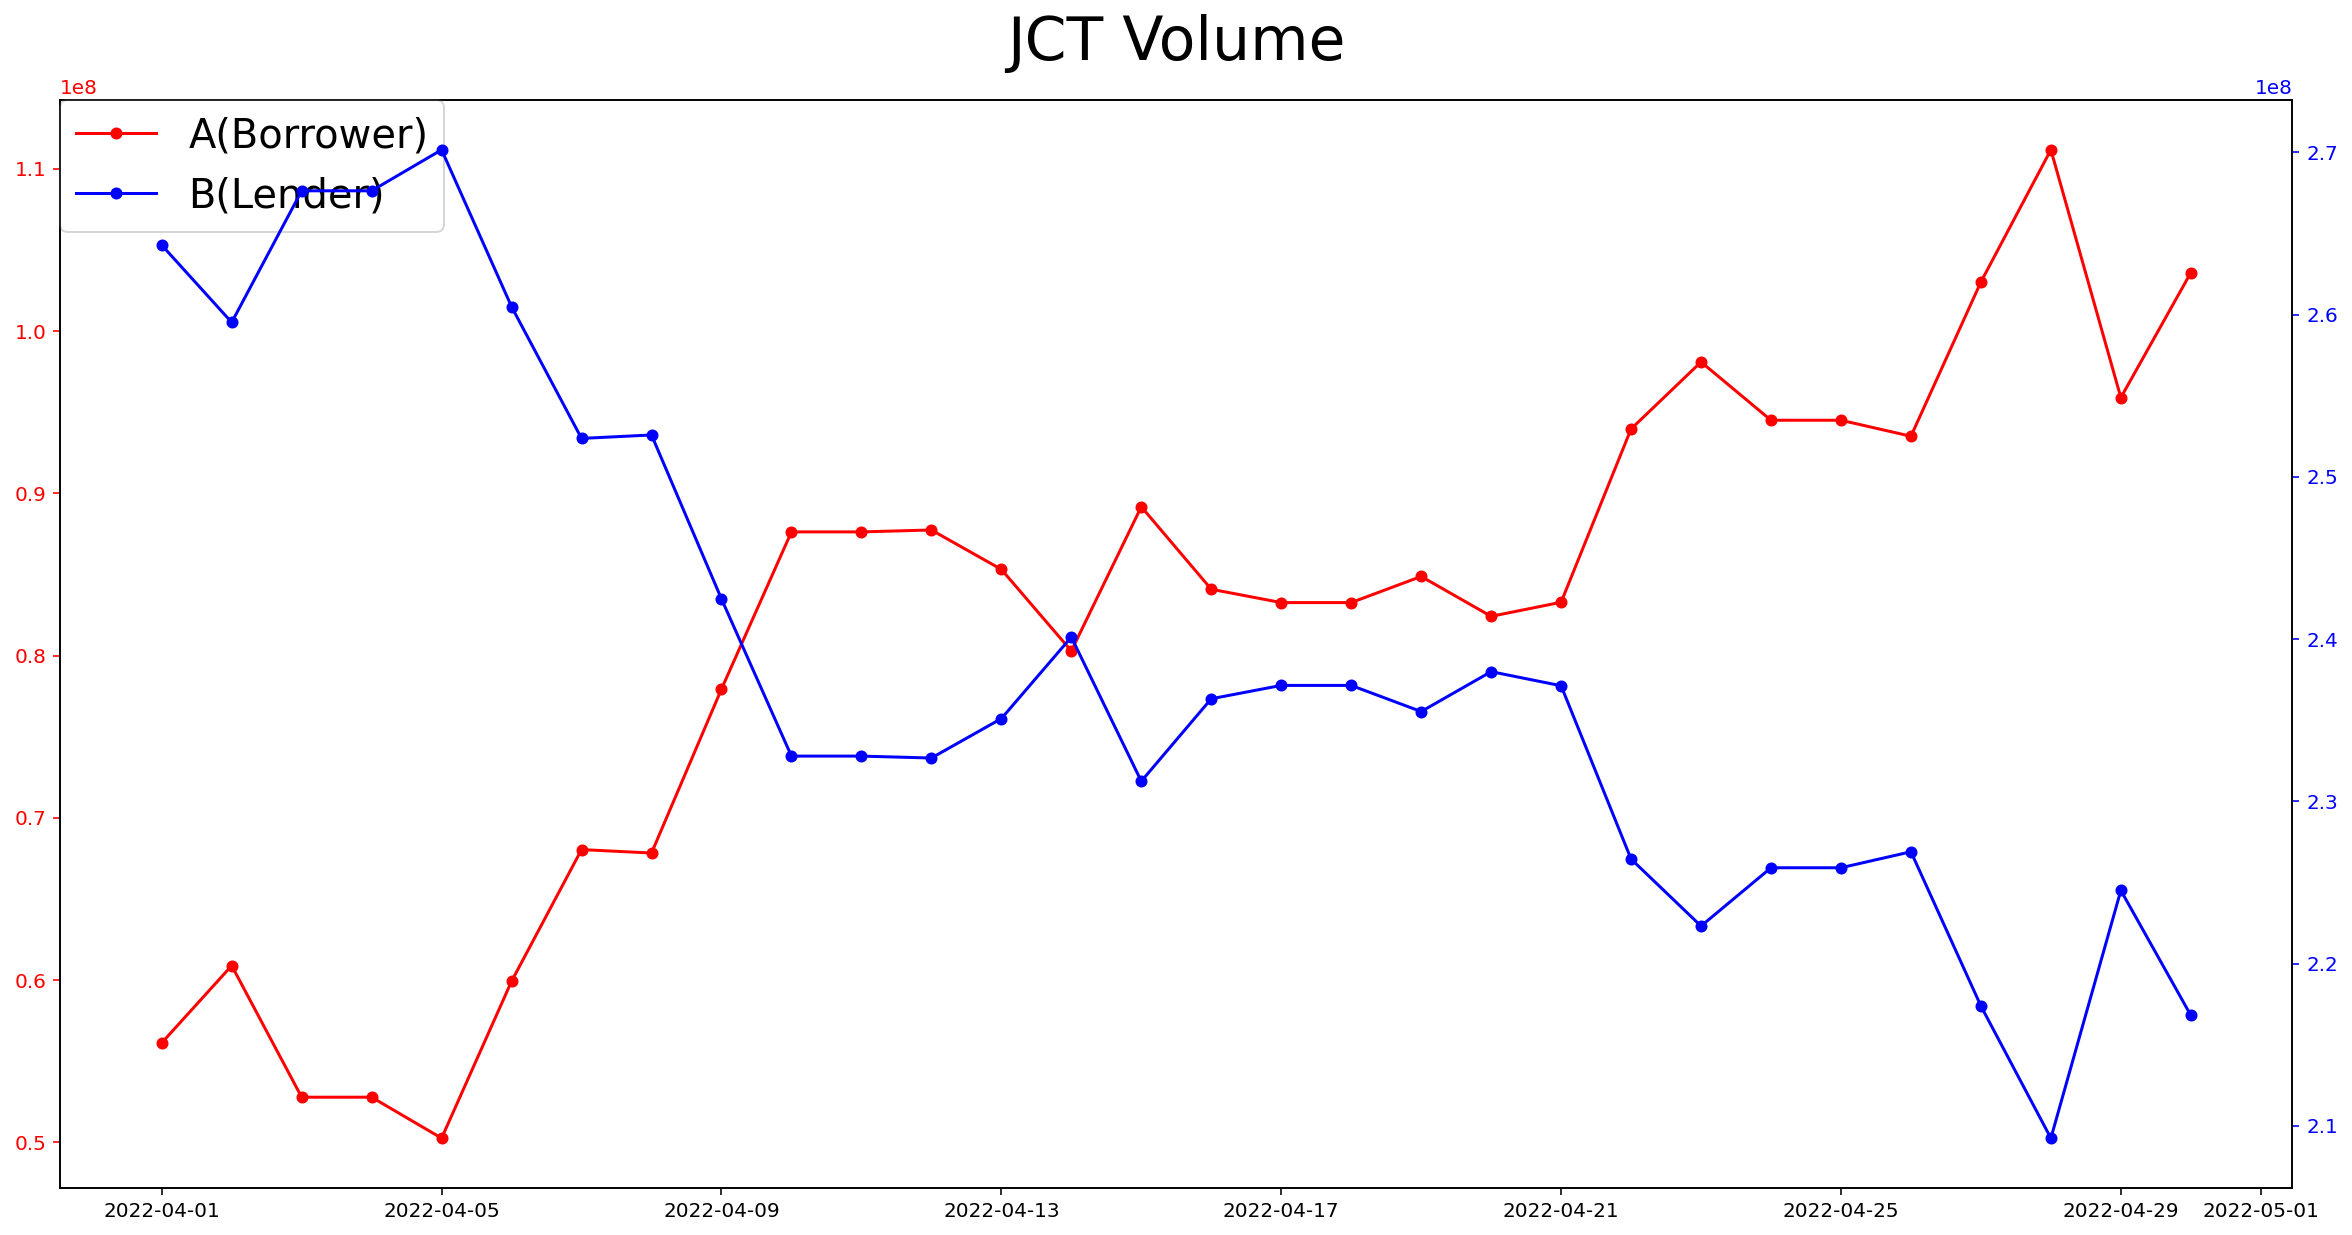

In [8]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

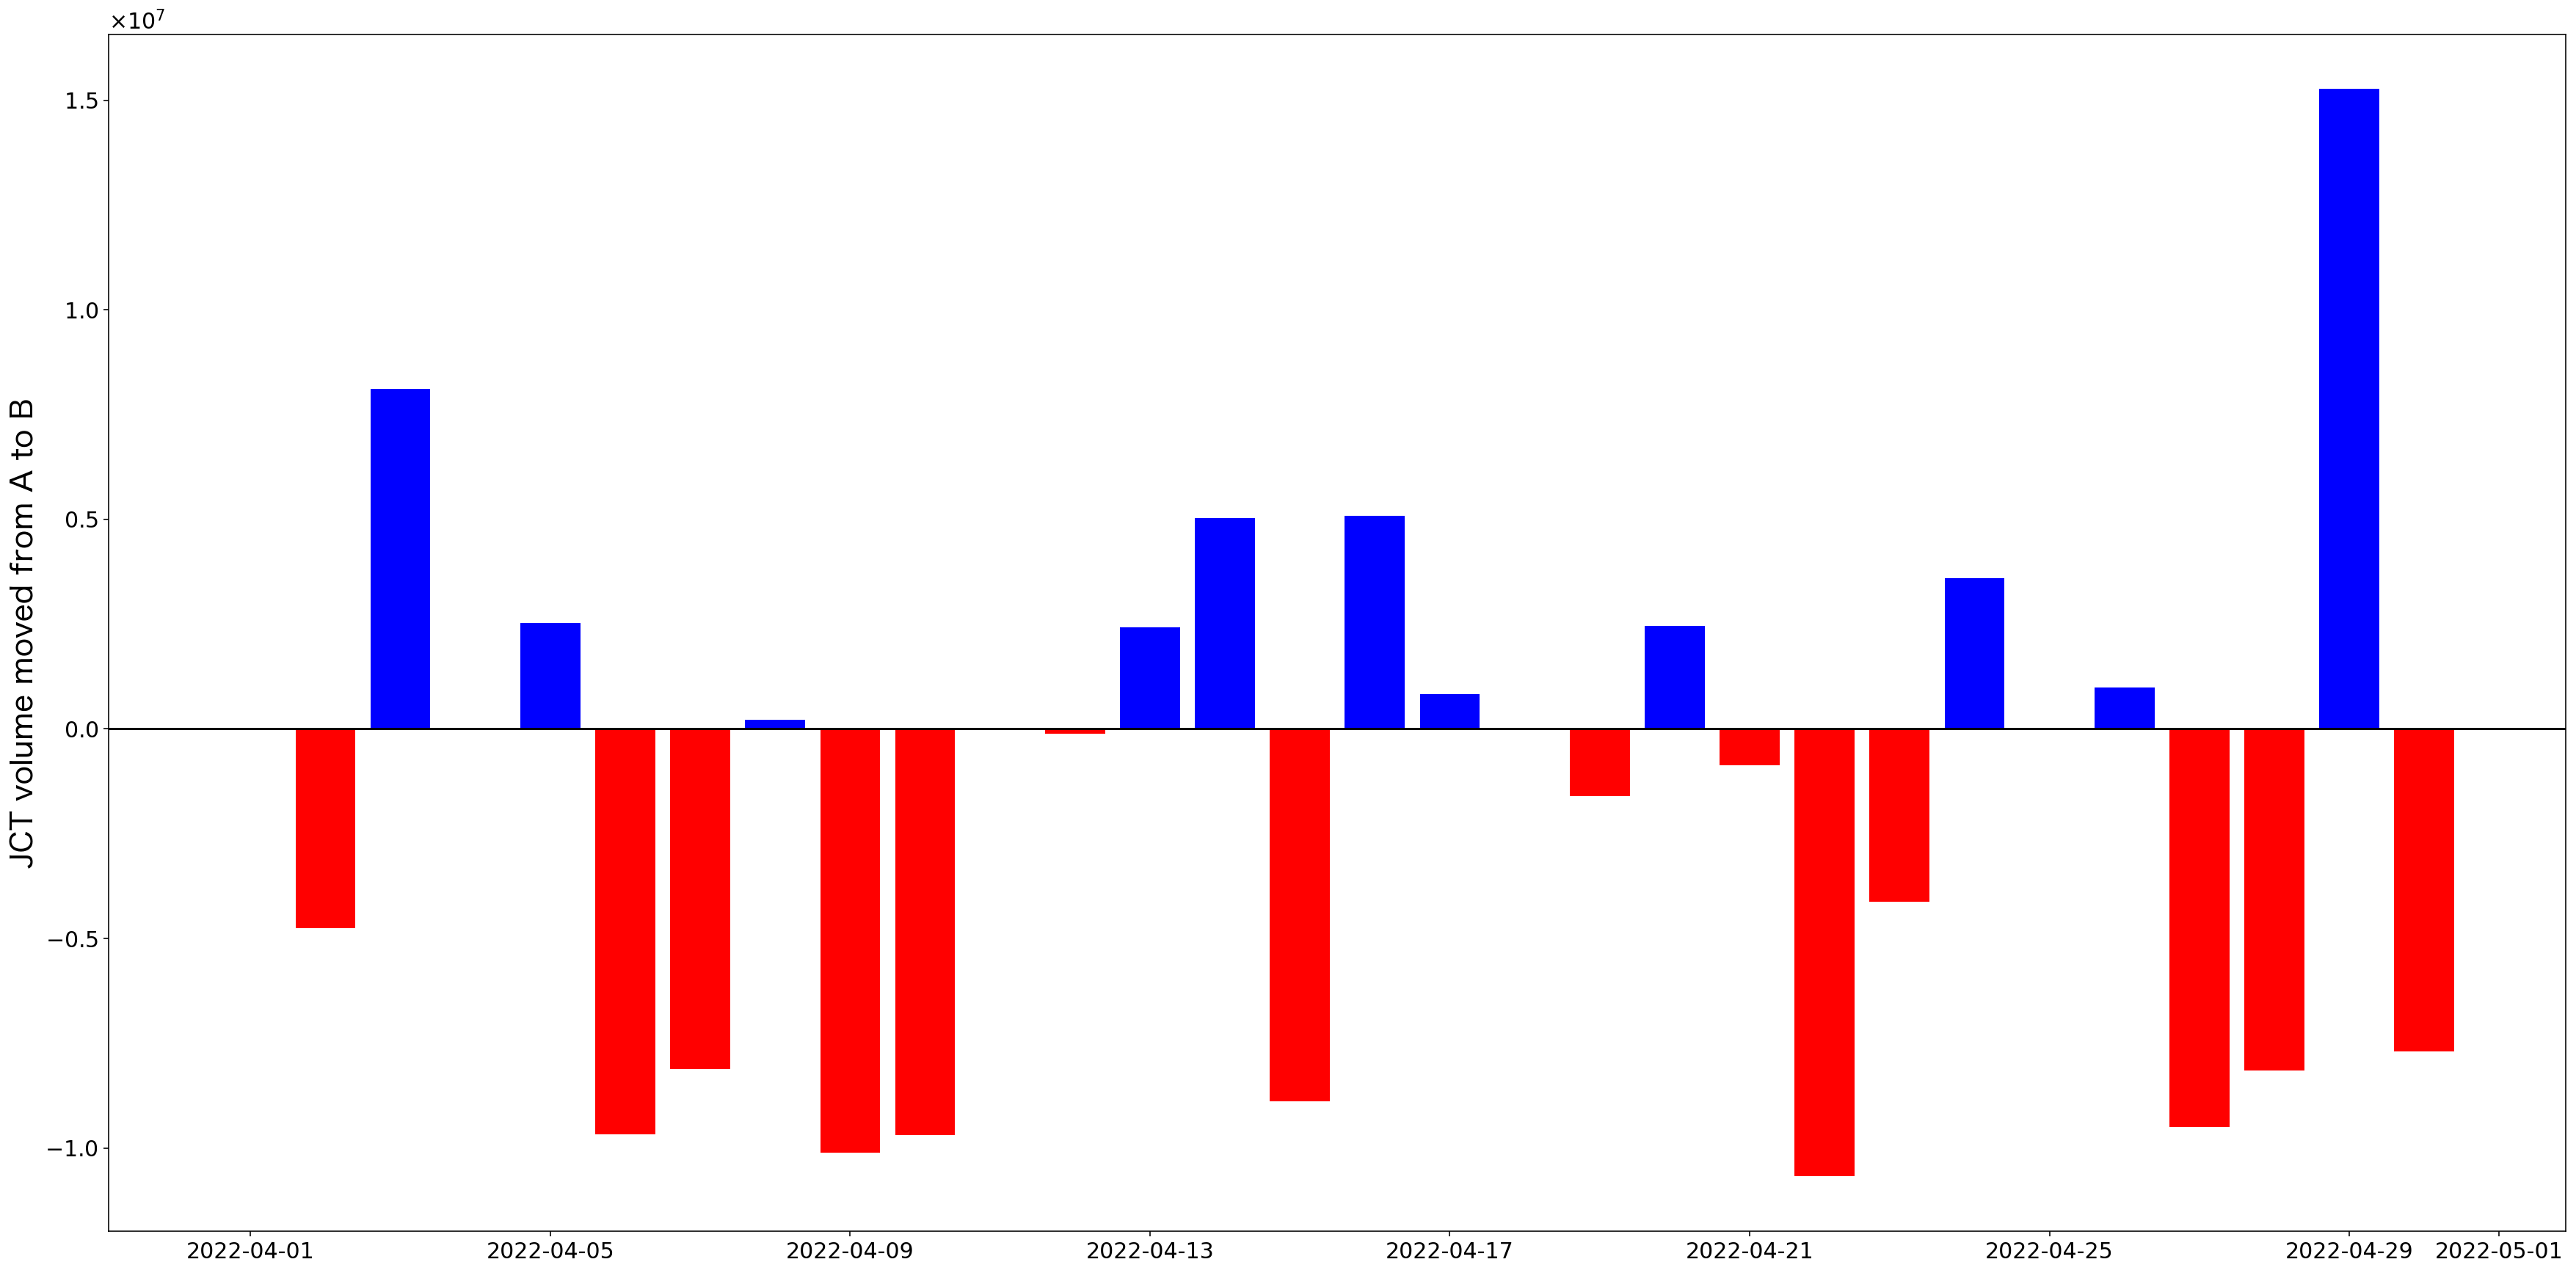

In [9]:
fig, ax = plt.subplots(figsize=(30,15))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
# ax.set_title('時価更新に伴い生じる JCT 移動（A → B）', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT volume moved from A to B', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)